<a href="https://colab.research.google.com/github/filizolalab/CADD2021/blob/main/BSR3101_Tutorial_4_1__Working_with_molecules_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with molecules and preparing datasets for machine learning


*This tutorial is part of the BSR3101 Computer Aided Drug Design, and is based on [DeepChem tutorials](https://github.com/deepchem/deepchem/tree/master/examples/tutorials). Also check the [DeepChem website](https://deepchem.io/) for other tutorials and documentation.*

We will use [`deepchem`](https://deepchem.io/) and [`rdKit`](https://www.rdkit.org/) within the [Google Colaboratory](https://colab.research.google.com/) framework. Google Colaboratory is a cloud-based platform to run python code without the need to setup your local machine with a python environment. It allows you to write and execute Python in your browser, with zero configuration required, Free access to GPUs, Easy sharing. The code you develop and run in colab will run in any python environment. [`deepchem`](https://deepchem.io/) is a pyhton library that implements tools to create high quality, open source tools for drug discovery, materials science, quantum chemistry, and biology. [`rdKit`](https://www.rdkit.org/) is a library of chemoinformatics 

## Install and import `rdkit` and `deepchem`

To run this tutorial the machine where the calculations are executed must have a copy of the `rdkit` libarary installed. If you're running this on a machine where this is not the case, the library can be installed with the following `pip` command You can of course run this tutorial *locally* if you prefer. In 
this case, don't run the `pip install` cell since it will download and install Anaconda on your local machine. 

In [ ]:
#!pip install --pre rdkit-pypi 
!pip install --pre deepchem

     |████████████████████████████████| 609 kB 6.8 MB/s 
     |████████████████████████████████| 20.6 MB 54.1 MB/s 


Installing the library is not enough... the library (or parts of it) have to be "imported" into the program so that its functions and objects can be accessed. The following commands load the required `rdkit` functions so they are available for use in this notebook. 



In [ ]:
## import deepchem
import deepchem as dc

## import some rdkit functions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


We also load the `pandas` library and the `numpy` library. These provide common functions for math and tables. Here we import them with shortcut names so that it will be quicker to use them in the following.


In [ ]:
## import pandas and numpy for tables and maths
import pandas as pd
import numpy as np

## 1. Create `rdkit` molecule objects and display them


### Create a molecule object from a SMILES string

Using `rdkit` it's sraightforward to convert a SMILES string to an image of the corresponding molecule. 

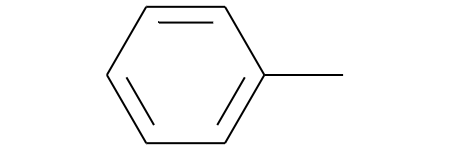

In [ ]:
smiles = 'Cc1ccccc1'
molecule = Chem.MolFromSmiles(smiles)
molecule


We can use the same functions to create a list of molecule objects from a list of SMILES strings


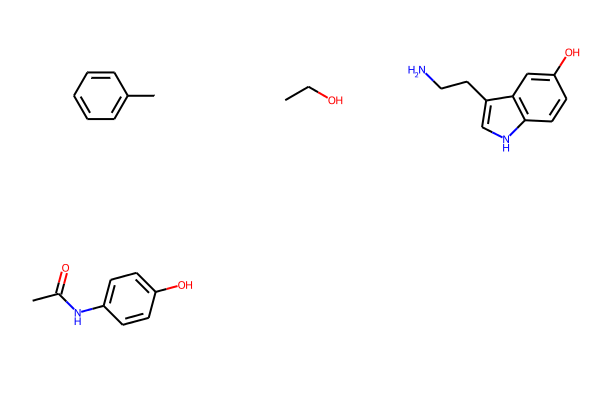

In [ ]:
smiles_list = ['Cc1ccccc1',
               'CCO',
               'C1=CC2=C(C=C1O)C(=CN2)CCN',
               'CC(=O)NC1=CC=C(C=C1)O']
molecule_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Draw.MolsToGridImage(molecule_list)

If we have labels for our molecules, we can add them to the plot as follows

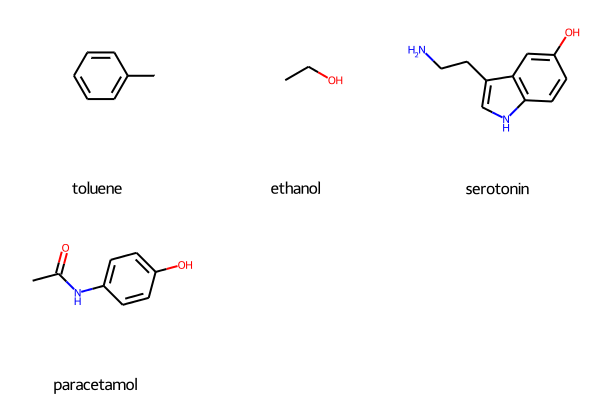

In [ ]:
molecule_names = ['toluene','ethanol','serotonin','paracetamol']
Draw.MolsToGridImage(molecule_list, legends=molecule_names)


## 2. Featurizing molecules in `deepchem`




"Featurizing" a molecule means transforming it into a vector, or matrix, or more complex representation that can be used as an input for a machine learning algorithm. We have seen basic featurization methods such as fingerprints and molecular properties. These are easy to calculate in `deepchem`.

A [full list of `deepchem` featurizers](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html) is available here.

### Fingerprints


In [ ]:
import deepchem as dc
### calculate fingerprints for the molecules defined in `molecule_list`
featurizer = dc.feat.CircularFingerprint()
fingerprints = featurizer(molecule_list)

fingerprints

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Molecular properties

In [ ]:
### calculate RDKit descriptors
rdkit_featurizer = dc.feat.RDKitDescriptors()
features = rdkit_featurizer(molecule_list)
pd.DataFrame(features, columns=rdkit_featurizer.descriptors)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,...,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.083333,1.321759,2.083333,1.321759,0.458806,92.141,84.077,92.062600,36.0,0.0,-0.039775,-0.062249,0.062249,0.039775,1.000000,1.571429,1.857143,13.782105,10.244626,1.715255,-1.822324,1.916279,-1.622156,5.111827,1.475757,3.021465,129.965660,5.112884,4.386751,4.386751,3.393847,2.410684,2.410684,1.654701,1.654701,0.940456,0.940456,0.534378,0.534378,-0.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.569444,0.250000,7.569444,0.250000,0.406808,46.069,40.021,46.041865,20.0,0.0,0.040221,-0.396664,0.396664,0.040221,2.000000,2.000000,2.000000,16.248991,10.908168,1.340294,-1.522359,1.296243,-1.568364,3.835802,0.318406,1.632993,2.754888,2.707107,2.154320,2.154320,1.414214,1.023335,1.023335,0.316228,0.316228,0.000000,0.000000,0.000000,0.000000,-0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.296142,0.296640,9.296142,0.296640,0.646845,176.219,164.123,176.094963,68.0,0.0,0.115838,-0.507941,0.507941,0.115838,1.384615,2.230769,3.000000,16.254673,10.113650,2.021859,-1.958270,2.222395,-2.011819,5.840296,0.475910,2.576000,419.782009,9.259149,7.248179,7.248179,6.308862,4.300793,4.300793,3.082475,3.082475,2.164682,2.164682,1.528734,1.528734,-1.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.524469,-0.115102,10.524469,0.115102,0.595026,151.165,142.093,151.063329,58.0,0.0,0.220747,-0.507964,0.507964,0.220747,1.363636,1.909091,2.363636,16.254689,10.280191,1.928036,-1.994554,2.125248,-2.044011,5.880955,-0.113736,2.736298,253.299498,8.267585,6.164863,6.164863,5.181541,3.249098,3.249098,2.228060,2.228060,1.187673,1.187673,0.748027,0.748027,-1.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Molecular Graphs

Molecular graphs are a powerful representation of molecules that encode the bond structure (who is close to whom) and the features of each atom. THey are meant to be used with convolutional molecular networks that operate in a similar way to convolutional neural networks on images.

In [ ]:
molGraph_featurizer = dc.feat.ConvMolFeaturizer()
features = molGraph_featurizer(molecule_list)

Let us inspect the representation of the first molecule in the list, i.e. toluene.
* the `get_adjacency_list()` method provides a list of which atoms are connected to each atom in the molecule
* the `get_atom_features()` method provides a list of features associated to each atom. These are basic properties such as valence, 

In [ ]:
features[0].get_adjacency_list()

[[6], [6, 2], [1, 3], [2, 4], [3, 5], [4, 6], [0, 1, 5]]

In [ ]:
print(features[0].get_atom_features())


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## 3. Working with `deepchem` datasets

#### MoleculeNet

`deepchem` provides easy access to several databases of molecules through `molnet`. These datasets can be used directly for training machine-learning models, as well as for testing purposes.

* `load_pcba()` PubChem BioAssay (PCBA) is a database consisting of biological activities of small molecules generated by high-throughput screening. We use a subset of PCBA, containing 128 bioassays measured over 400 thousand compounds, used by previous work to benchmark machine learning methods.
* `load_chembl()` This dataset is based on release 22.1 of the data from [CHEmbl](https://www.ebi.ac.uk/chembl/).
* `load_zinc15()` ZINC15 is a dataset of over 230 million purchasable compounds for virtual screening of small molecules to identify structures that are likely to bind to drug targets. ZINC15 data is currently available in 2D (SMILES string) format.
* `load_delaney()` The Delaney (ESOL) dataset a regression dataset containing structures and water solubility data for 1128 compounds. The dataset is widely used to validate machine learning models on estimating solubility directly from molecular structures (as encoded in SMILES strings).
* `load_tox21()` The “Toxicology in the 21st Century” (Tox21) initiative created a public database measuring toxicity of compounds, which has been used in the 2014 Tox21 Data Challenge. This dataset contains qualitative toxicity measurements for 8k compounds on 12 different targets, including nuclear receptors and stress response pathways.


When loading a dataset from `molnet`, we can directly specify the featurization we want to use, and the data will be directly downloaded in a featurized form.


In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
print(tasks)

['measured log solubility in mols per litre']


In [ ]:
print(f'training dataset contains {len(train_dataset)} molecules')
print(f'validation dataset contains {len(valid_dataset)} molecules')
print(f'test dataset contains {len(test_dataset)} molecules')

training dataset contains 902 molecules
validation dataset contains 113 molecules
test dataset contains 113 molecules


we can print a pretty table with the data using the `pandas` library that we imported previously. the `.head()` method prints just the first few lines for inspection.

In [ ]:
train = pd.DataFrame(train_dataset.y, columns=tasks)
train['smiles'] = train_dataset.ids
train.head()

,measured log solubility in mols per litre,smiles
0,0.390413,CC(C)=CCCC(C)=CC(=O)
1,0.090421,CCCC=C
2,-2.464346,CCCCCCCCCCCCCC
3,0.704920,CC(C)Cl
4,1.159746,CCC(C)CO


#### the `dataset` structure

Now let's consider the contents of the `dataset`. Every dataset stores a list of samples. Very roughly speaking, a sample is a single data point. In this case, each sample is a molecule. In other datasets a sample might correspond to an experimental assay, a cell line, an image, or many other things. For every sample the dataset stores the following information.



* the "features", referred to as `X`. This is the input that should be fed into a model to represent the sample.

In [ ]:
train_dataset.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])


* the "labels", referred to as `y`. This is the desired output from the model. During training, it tries to make the model's output for each sample as close as possible to `y`.

In [ ]:
train_dataset.y[:10]

array([[ 0.39041294],
       [ 0.09042128],
       [-2.46434643],
       [ 0.70492033],
       [ 1.15974639],
       [-0.03538168],
       [-0.60149498],
       [ 0.51137732],
       [-0.14666891],
       [-0.91358308]])


* optionally, the weights, referred to as `w`. This can be used to indicate that some data values are more important than others. 

In [ ]:
train_dataset.w[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])


* optionally, an ID, which is a unique identifier for the sample. This can be anything as long as it is unique. Sometimes it is just an integer index, or the SMILES string describing the molecule.


In [ ]:
train_dataset.ids[:10]

array(['CC(C)=CCCC(C)=CC(=O)', 'CCCC=C', 'CCCCCCCCCCCCCC', 'CC(C)Cl',
       'CCC(C)CO', 'CCCCCCCCCC(C)O', 'CCOP(=S)(OCC)SCSCC', 'CCCCCCCO',
       'CCCCCCCC(=O)OC', 'CCOP(=S)(OCC)SCSC(C)(C)C'], dtype=object)

The final piece of information listed in the output is `task_names`. Some datasets contain multiple pieces of information for each sample. For example, if a sample represents a molecule, the dataset might record the results of several different experiments on that molecule. This dataset has only a single task: "measured log solubility in mols per litre".

In [ ]:
tasks

['measured log solubility in mols per litre']

### Creating a dataset from scratch using your data

When working with your own data, the information must be prepared to work with the modeling tools in `deepchem`. Let us see how to proceed. We will use as an example the `opk.csv` file that contains 100 ligands that are either active (`kor_activity`=1) or inactive (`kor_activity`=0) at the kappa-opoid receptor. 

First we need to read the file from the local machine. If you're running this tutorial on Google Colab, you will need the `files` function from the `google.colab` library. Click on "Browse" and navigate to the file to upload it to the remote colab resource.

In [ ]:
# upload file to remote Colab machine: do this only if you're running on a cloud resource
# skip to the next cell if you're running locally in a Jupyter notebook

from google.colab import files
uploaded = files.upload()


Read the data from the `opk.csv` file. We use the `pandas` library for this.


In [ ]:
data = pd.read_csv('opk.csv')
data.head()

,smiles,kor_activity
0,Clc1cccc(CSc2nnc(c3ccccn3)n2Cc4occc4)c1,1
1,Brc1ccc(CSc2nnc(c3ccccn3)n2Cc4occc4)cc1,1
2,CC[C@@](C)(N(Cc1occc1)C(=O)c2ccccn2)C(=O)NC3CCCC3,1
3,CC[C@@](C)(N(Cc1occc1)C(=O)c2cnccn2)C(=O)NC3CC...,1
4,C(Sc1nnc(c2ccccn2)n1Cc3occc3)\C=C\c4ccccc4,1


Since we read the fingerprints, we now need to specify a featurization scheme for our molecules, and create the features. Depending on the problem, we might make different choices. Here we use the classical ECFP fingerprints, using the default parameters.

In [ ]:
## we extract the smiles and the activity label (1/0) 
smiles_list2 = data.smiles.to_list()
activity = data.kor_activity

## calculate features for all the smiles in the list
featurizer = dc.feat.CircularFingerprint()
fingerprints = featurizer(smiles_list2)



we can now create the `deepchem` dataset that combines the features, activity labels, and IDs

In [ ]:
## and create the `deepchem` dataset 
dataset = dc.data.NumpyDataset(X=fingerprints, y=activity, ids=smiles_list)
dataset

<NumpyDataset X.shape: (100, 2048), y.shape: (100,), w.shape: (100,), ids: ['Clc1cccc(CSc2nnc(c3ccccn3)n2Cc4occc4)c1'
 'Brc1ccc(CSc2nnc(c3ccccn3)n2Cc4occc4)cc1'
 'CC[C@@](C)(N(Cc1occc1)C(=O)c2ccccn2)C(=O)NC3CCCC3' ...
 'CCN(Cc1ccccc1)S(=O)(=O)c2ccc(cc2)C(=O)N(CCC[NH+](C)C)c3nc4cc5OCOc5cc4s3'
 'CN1C(=O)N(C)c2nc(nc(SCC(=O)Nc3cc(C)on3)c2C1=O)c4ccc(C)cc4'
 'CCOc1ccc(NC(=O)CSc2nccn2Cc3occc3)cc1'], task_names: [0]>

Finally, we want to split this dataset into the train/validation/test sets. We can use the `deepchem` function `RandomSplitter` to split randomly. Other splitters are available that divide the dataset in terms of the molecular scaffolds, or clustering, or values of the molecular properties. See a full list [here](https://deepchem.readthedocs.io/en/latest/api_reference/splitters.html).


In [ ]:
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)

print(f'total {len(dataset)}')

print(f'train {len(train_dataset)}')
print(f'valid {len(valid_dataset)}')
print(f'test {len(test_dataset)}')

total 100
train 80
valid 10
test 10


## 4. Analyzing molecules in `rdkit`

Sometimes it's useful to directly ue `rdKit` (instead of `deepchem`) to manipulate molecules. A longer list of examples is available in the RDKit documentation [here](https://www.rdkit.org/docs/GettingStartedInPython.html).  Here we leave some references for basic tasks. 

### 4.1 Calculate molecular properties with `rdkit`

`RDKit` provides an extensive list of functions to calculate molecular properties. The full list is reported [here](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html). Properties can be calculated individually (if only a few are needed):

In [ ]:
from rdkit.Chem import rdMolDescriptors, Crippen

pd.DataFrame(
    {'smiles': smiles_list,
     'RB': [rdMolDescriptors.CalcNumRotatableBonds(molecule) for molecule in molecule_list],
     'HBD': [rdMolDescriptors.CalcNumHBD(molecule) for molecule in molecule_list],
     'HBA': [rdMolDescriptors.CalcNumHBA(molecule) for molecule in molecule_list],
     'MW': [rdMolDescriptors.CalcExactMolWt(molecule) for molecule in molecule_list],
     'logP': [Crippen.MolLogP(mol) for mol in molecule_list]})



A wrapper function to calculate a set of commonly used properties is also available. Here we also create a `pandas` table to display the results.

In [ ]:
from rdkit.Chem import rdMolDescriptors as rdMD, Descriptors

props = rdMD.Properties()
names = list(props.GetAvailableProperties())
results = [props.ComputeProperties(mol) for mol in molecule_list]
pd.DataFrame(results, columns = names)

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,92.062600,92.141,0.0,0.0,0.0,0.0,0.0,7.0,15.0,0.0,0.0,0.142857,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.796345,0.00,1.99502,31.1790,4.386751,2.410684,0.940456,0.940456,0.534378,4.386751,2.410684,0.940456,0.940456,0.534378,-0.78,4.380772,1.783286,1.038264,1.116024
1,46.041865,46.069,1.0,1.0,0.0,1.0,1.0,3.0,9.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.898427,20.23,-0.00140,12.7598,2.154320,1.023335,0.000000,0.000000,0.000000,2.154320,1.023335,0.000000,0.000000,0.000000,-0.04,2.960000,1.960000,1.960000,1.933867
2,176.094963,176.219,3.0,4.0,2.0,3.0,2.0,13.0,25.0,3.0,0.0,0.200000,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.186237,62.04,1.37470,52.7219,7.248179,4.300793,2.164682,2.164682,1.528734,7.248179,4.300793,2.164682,2.164682,1.528734,-1.48,8.133459,3.106143,1.380449,1.943361
3,151.063329,151.165,3.0,2.0,1.0,2.0,2.0,11.0,20.0,3.0,1.0,0.125000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.666905,49.33,1.35060,42.4105,6.164863,3.249098,1.187673,1.187673,0.748027,6.164863,3.249098,1.187673,1.187673,0.748027,-1.51,7.595374,3.053138,2.292304,2.108157


### 4.2. Calculating fingerprints in `rdkit`

`rdkit` makes it easy to calculate several types of fingerprints starting from the `molecule` objects generated from the SMILES strings.


In [ ]:
## import the `rdkit` functions needed for this task
from rdkit.Chem import AllChem
from rdkit import DataStructs

## calculated the linear fingerprints for all the molecules in the `molecule_list`
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,4,1024) for mol in molecule_list]


using the `GetOnBits()` method we can easily inspect which bits are non-zero in one fingerprint array

In [ ]:
fps_mol0 = fps[0]
list(fps_mol0.GetOnBits())


[31, 33, 64, 175, 356, 389, 698, 726, 799, 821, 849, 896, 923]

The `BulkTanimotoSimilarity` is useful to calculate the Tanimoto Similarity of one reference ligand to a set of ligands:

In [ ]:
ref_fingerprint = fps[0]
bulk_fps = DataStructs.BulkTanimotoSimilarity(ref_fingerprint,fps)

In [ ]:
pd.DataFrame({
    'smiles':smiles_list,
    'TC_toluene': bulk_fps
})

,smiles,TC_toluene
0,Cc1ccccc1,1.000000
1,CCO,0.055556
2,C1=CC2=C(C=C1O)C(=CN2)CCN,0.076923
3,CC(=O)NC1=CC=C(C=C1)O,0.121212


to use the tanimoto similarities as lables we must convert them from numbers to formatted strings (her we show two decimals).

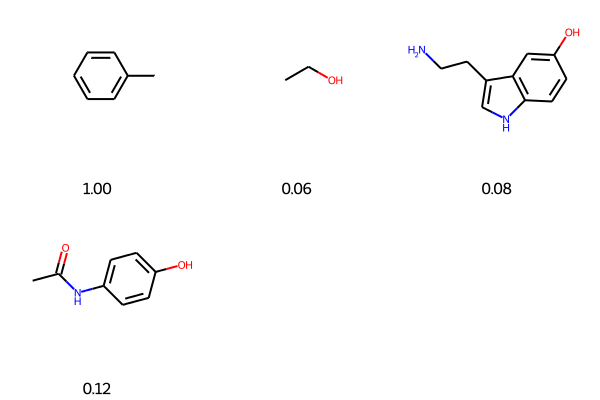

In [ ]:
molecule_tc_label = [f'{tc:.2f}' for tc in bulk_fps]
Draw.MolsToGridImage(molecule_list, legends=molecule_tc_label)

## 4.3 Clustering in rdKit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define clustering setup
def cluster_fingerprints(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs



We use the `molnet` Delaney set as an example.

In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='Raw')

We first extract the SMILES, create `RDKit` molecule objects, and the corresponding fingerprints

In [ ]:
smiles = datasets[0].ids
ms = [Chem.MolFromSmiles(x) for x in smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(x,4,2048) for x in ms]

Then we can apply our simple `cluster_fingerprint` function and show the resulting sizes in a table

In [ ]:
clusters = cluster_fingerprints(fps,cutoff=.4)

In [ ]:
pd.DataFrame({
'cluster_number':range(len(clusters)),
'cluster_size':[len(cluster) for cluster in clusters]}).head()


,cluster_number,cluster_size
0,0,14
1,1,4
2,2,7
3,3,6
4,4,5


In [ ]:
# show one of the clusters
print(clusters[2])


(747, 740, 741, 742, 744, 745, 746)


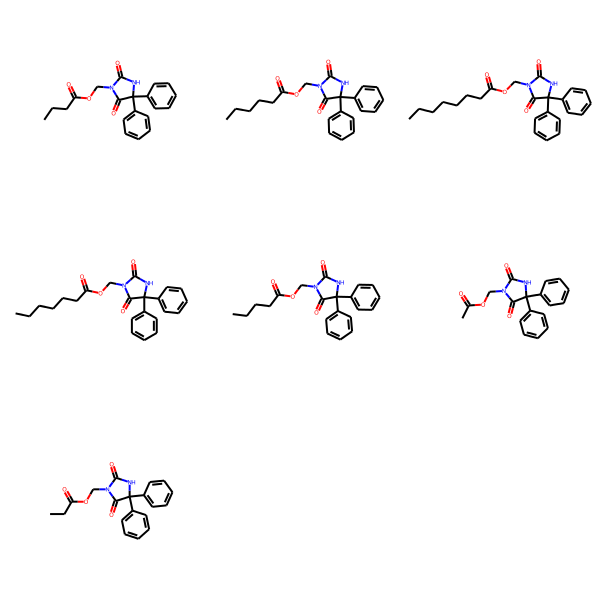

In [ ]:
# now display structures from one of the clusters
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
mols=[ms[i] for i in clusters[2]]
Draw.MolsToGridImage(mols)